In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

haberman=pd.read_csv("C:/Users/lenovo/Downloads/haberman.csv")

In [3]:
print(haberman.shape)
print(haberman.columns)

(306, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [4]:
haberman["status"].value_counts()


1    225
2     81
Name: status, dtype: int64

In [5]:
haberman["age"].value_counts()


52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: age, dtype: int64

In [6]:
haberman["year"].value_counts()


58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: year, dtype: int64

In [7]:
haberman["nodes"].value_counts()

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: nodes, dtype: int64

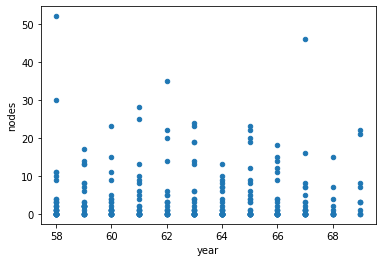

In [8]:
haberman.plot(kind="scatter", x='year', y='nodes')
plt.show()

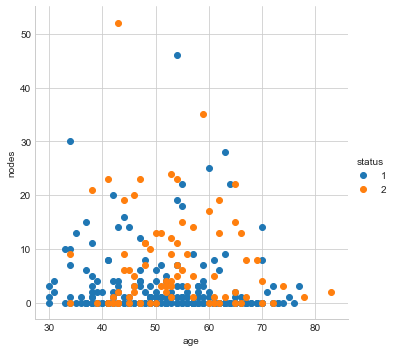

In [19]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();

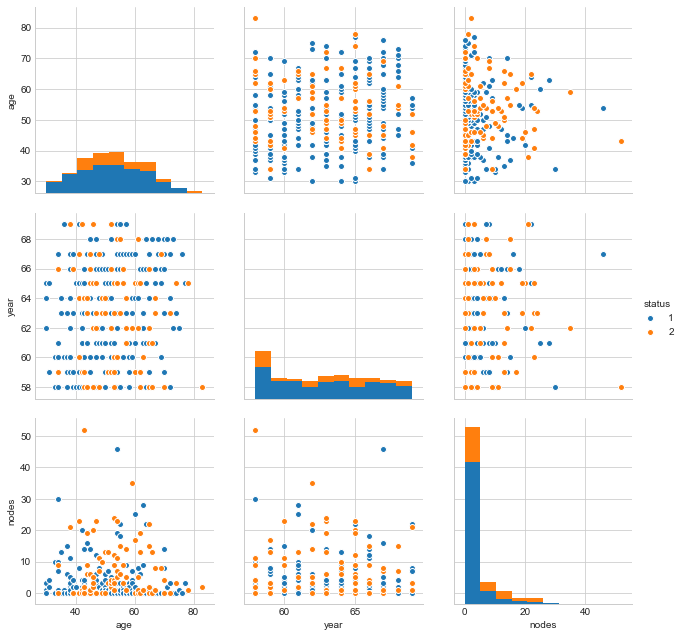

In [20]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", size=3,vars=['age','year','nodes']);
plt.show()


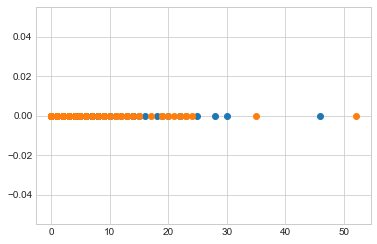

In [30]:
import numpy as np
long_survival = haberman.loc[haberman["status"] == 1];
short_survival = haberman.loc[haberman["status"] ==2];
# 1 D scatter plot
plt.plot(long_survival["nodes"], np.zeros_like(long_suvival['nodes']), 'o')
plt.plot(short_survival["nodes"], np.zeros_like(short_survival['nodes']), 'o')
plt.show()

C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


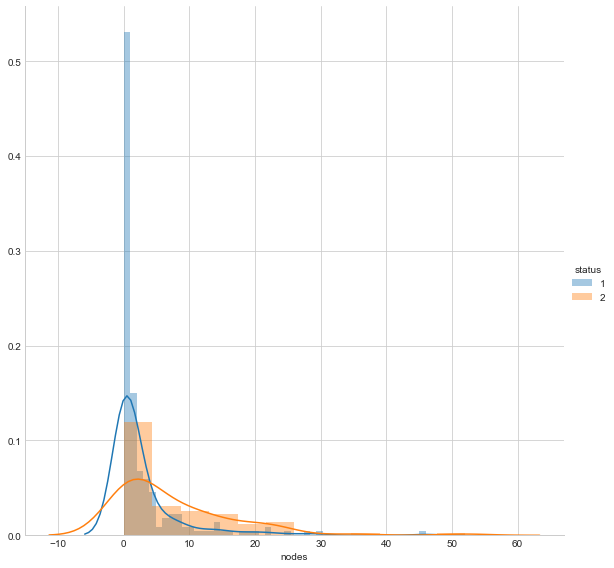

In [31]:
sns.FacetGrid(haberman, hue="status", size=8) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

# i will accept this plot

In [32]:
# if ( node <= 0 )
# patient = long survival

# else if( node >= 0 && node<= 3.5)
# patient = long survival chances are high

# else if (node > 3.5)
# patient = short_survival

C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


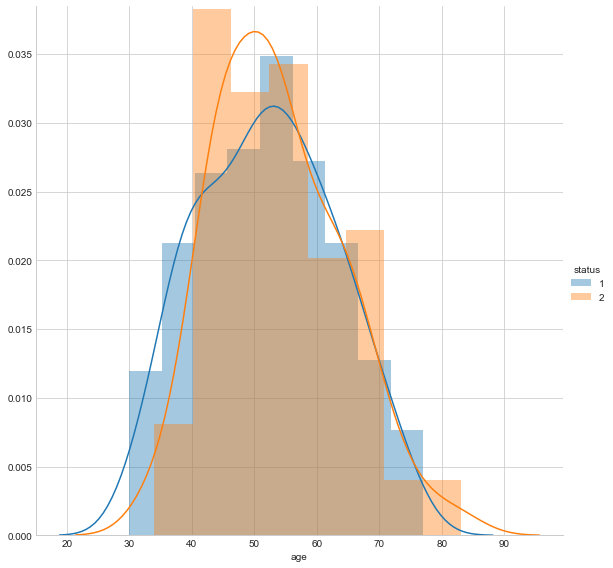

In [33]:
sns.FacetGrid(haberman, hue="status", size=8) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

# plot is messy, can't be accepted

C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


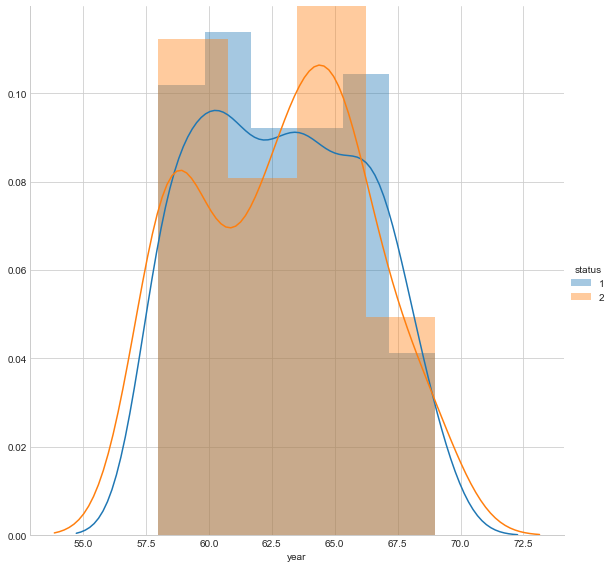

In [34]:
sns.FacetGrid(haberman, hue="status", size=8) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();
# unacceptable plot

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


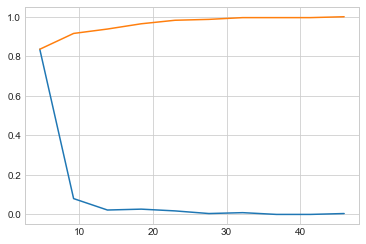

In [37]:
# plot CDF of each feature one-by-one

counts, bin_edges = np.histogram(long_survival['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.show();

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


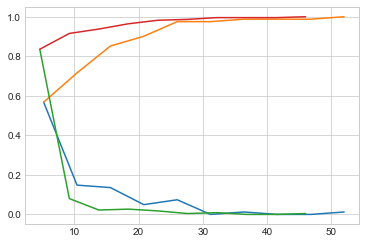

In [40]:
counts, bin_edges = np.histogram(short_survival['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(long_survival['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


plt.show();

In [41]:
# mean , median , std-dev

print("Means:")
print(np.mean(long_survival["nodes"]))
#Mean with an outlier.
print(np.mean(np.append(long_survival["nodes"],50)));
print(np.mean(short_survival["nodes"]))

print("\nStd-dev:");
print(np.std(long_survival["nodes"]))
print(np.std(short_survival["nodes"]))

Means:
2.7911111111111113
3.0
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632


In [45]:
# median , percentile , quantile , IDR, MAD

print("\nMedians:")
print(np.median(long_survival["nodes"]))
#Median with an outlier
print(np.median(np.append(long_survival["nodes"],50)));
print(np.median(short_survival["nodes"]))

print("\nQuantiles:")
print(np.percentile(long_survival["nodes"],np.arange(0, 100, 25)))
print(np.percentile(short_survival["nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(long_survival["nodes"],90))
print(np.percentile(short_survival["nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(long_survival["nodes"]))
print(robust.mad(short_survival["nodes"]))


Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


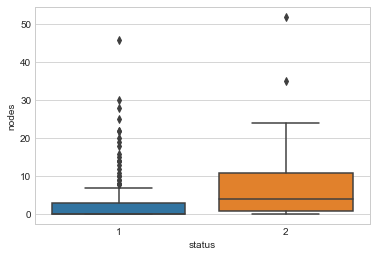

In [46]:
# box plot nd whiskers
sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()

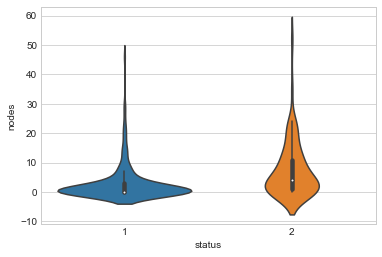

In [47]:
#violin plot
sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.show()

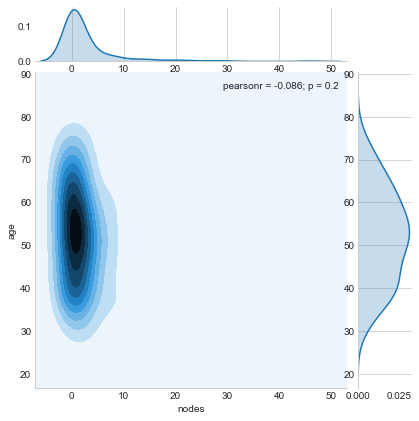

In [48]:
#2D Density plot, contors-plot
sns.jointplot(x="nodes", y="age", data=long_survival, kind="kde");
plt.show();